In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read Data
data=pd.read_csv('Reviews.csv')
data=data.head(1000)
print(data.head())
print(data.shape)
print(data['Text'].values[0])

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

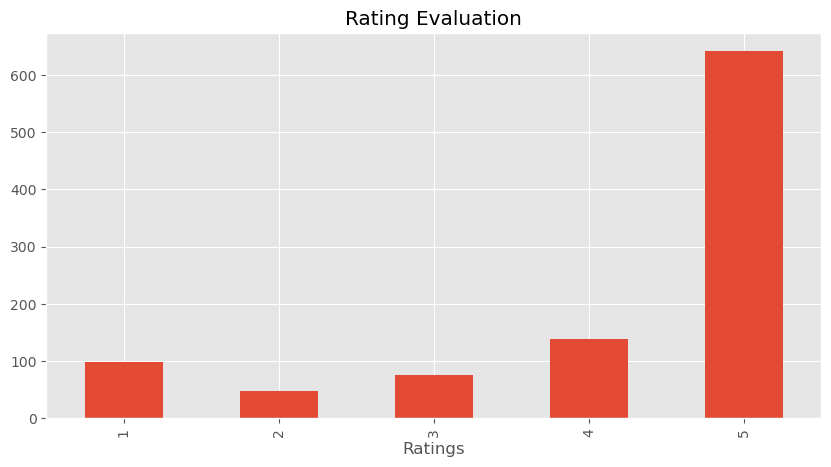

In [3]:
#  Quick EDA
data['Score'].value_counts().sort_index().plot(kind='bar',title='Rating Evaluation',figsize=(10,5))
plt.xlabel('Ratings')
plt.show()

In [4]:
example=data['Text'][50]
print(example)
tokens=nltk.word_tokenize(example)
tokens[:10]

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [5]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [6]:
 nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\chinm\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [7]:
 nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\chinm\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [8]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chinm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [11]:
# SIA analysis the sentence and gives the score based on it
sia.polarity_scores('today is the worst day')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [12]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [13]:
# Run the polarity test on the whole dataset
res={}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid]=sia.polarity_scores(text)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(data, how='left')

In [22]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


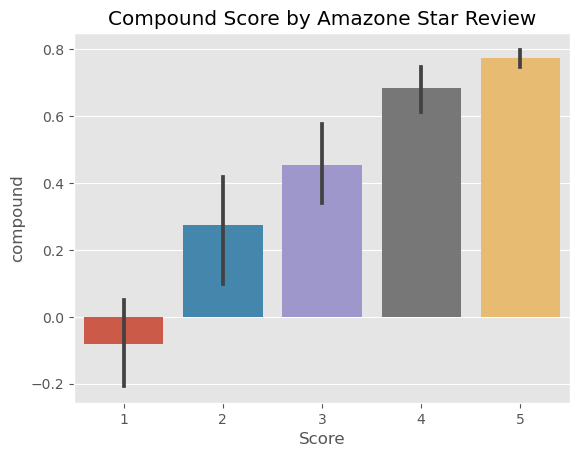

In [24]:
sns.barplot(data=vaders, x='Score', y='compound')
plt.title('Compound Score by Amazone Star Review')
plt.show()

Text(0.5, 1.0, 'Negative')

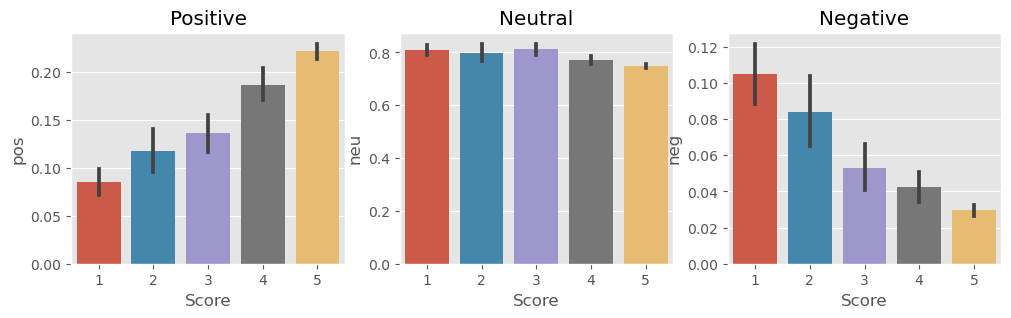

In [28]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

In [29]:
 pip install transformers

     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.7 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.7 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 355.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.4 MB 10.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/9.4 MB 10.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/9.4 MB 11.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.4 MB 11.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.4 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.4 MB 12.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.4 MB 10.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.4 MB 10.5 MB/s eta 0:00:01
   -------

In [32]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [33]:
from scipy.special import softmax

In [34]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\chinm\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chinm\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [35]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [37]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [46]:
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


In [58]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [64]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')

In [65]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [69]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [68]:
pip install tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 2.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.7 MB 5.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.7 MB 7.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/385.0 MB 17.5 MB/s eta 0:00:22
   ---------------------------------------- 1.0/385.0 MB 12.7 MB/s eta 0:00:31
   ---------------------------------------- 1.5/385.0 MB 11.8 MB/s eta 0:00:33
   ---------------------------------------- 2.0/385.0 MB 12.5 MB/s eta 0:00:31
   ---------------------------------------- 2.4/385.0 MB 13.0 MB/s eta 0:00:30
   -----

  You can safely remove it manually.


   ----------------- ---------------------- 168.3/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 168.6/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 168.9/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 169.2/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 169.5/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 169.6/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 170.0/385.0 MB 6.2 MB/s eta 0:00:35
   ----------------- ---------------------- 170.3/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 170.5/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 170.7/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 171.0/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- ---------------------- 171.3/385.0 MB 6.1 MB/s eta 0:00:36
   ----------------- -------------------

In [76]:
from tkinter import *
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax

# Load the pre-trained RoBERTa model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

window = Tk()
window.geometry('600x400')
window.config(bg='#25CBB9')
window.title('Sentiment Analyzer')
window.resizable(width=False, height=False)

displayResult = StringVar()

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

def check_sentiment():
    user_input = inputText_field.get()
    res = polarity_scores_roberta(user_input)
    
    if res['roberta_pos'] >= 0.05:
        displayResult.set('Positive')
    elif res['roberta_neg'] >= 0.05:
        displayResult.set('Negative')
    else:
        displayResult.set('Neutral')
    inputText_field.delete(0, END)

title = Label(window, text='Sentiment Analyzer: Please Insert Some Text Below', fg='#EEF909',
              bg='#25CBB9', font=('Arial', 16))
inputText_field = Entry(window, font=('Arial', 12))
button1 = Button(window, text='Classify Text', fg='#FAFAFA',
                 bg='#24C6D3', font=('Arial', 16), command=check_sentiment)
outputLabel = Label(window, fg='#D32E24',
                    bg='#25CBB9', font=('Arial', 16), textvariable=displayResult)

title.place(x=75, y=50)
inputText_field.place(x=110, y=120)
button1.place(x=320, y=120)
outputLabel.place(x=250, y=200)

window.mainloop()
